## Exploratory Data Analysis

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from difflib import SequenceMatcher

In [2]:
#read in the compressed pickle file
protein = pd.read_pickle('data/compressed-class-separated.pkl', compression = 'gzip')

In [3]:
#the memory usage of the dataframe
protein.memory_usage(deep=True).sum()/1_000_000

118.351587

In [4]:
## make each single letter amino acid it's own "word" for tokenizing
def make_words(sequence):
    
    """
    argument: amino acid sequence in single letter code/abbreviation
    output: input amino acid sequence with spaces between each single letter code
    """
    
    
    #instantiate empty string to concat amino acids to
    space_seq = ''
    
    #for loop to loop over each amino acid in the sequence and add it into the 
    #string with a space afterwards
    for char in sequence:
        space_seq += char
        space_seq += " "
    #remove the space at end of the new string
    return space_seq[:-1] 

## Visualizations of Protein Dataframe

In [5]:
protein.describe()

,Length,class
count,130981.00000,130981.000000
mean,421.86866,3.056222
std,388.60196,1.718652
min,4.00000,1.000000
25%,184.00000,2.000000
50%,341.00000,3.000000
75%,528.00000,3.000000
max,18562.00000,8.000000


In [6]:
protein.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130981 entries, 0 to 163627
Data columns (total 6 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Gene ontology (molecular function)  130981 non-null  object
 1   Sequence                            130981 non-null  object
 2   Length                              130981 non-null  int16 
 3   Organism                            130981 non-null  object
 4   Protein names                       130981 non-null  object
 5   class                               130981 non-null  int16 
dtypes: int16(2), object(4)
memory usage: 5.5+ MB


In [7]:
#the longest sequence in the protein dataframe
protein[protein['Length']==18562]['Sequence']

77061    MEGNEKKGGGLPPTQQRHLNIDTTVGGSISQPVSPSMSYSTDRETV...
Name: Sequence, dtype: object

C:\Users\Jen\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


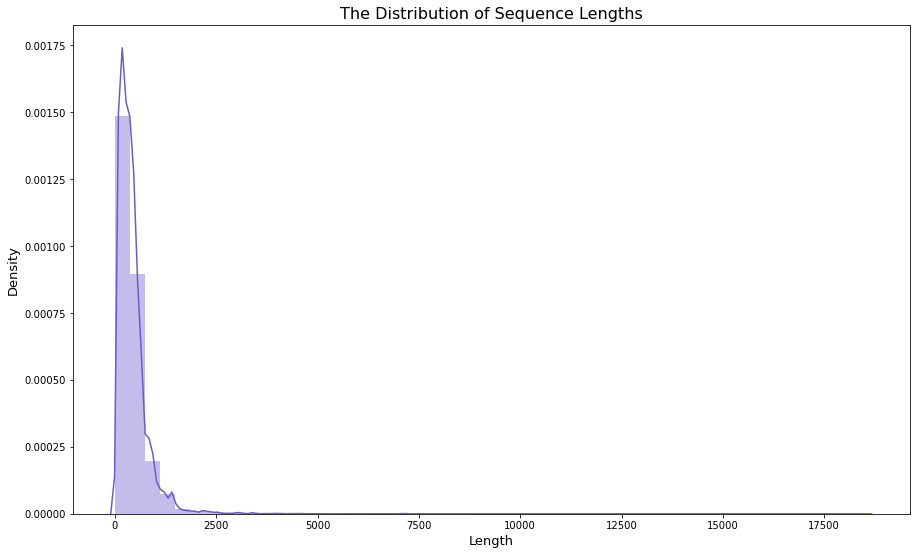

In [105]:
#create a histogram of the lengths of the sequencs
plt.figure(figsize=(15,9))
sns.distplot(protein['Length'], color = '#6A5ACD')
plt.title('The Distribution of Sequence Lengths', fontsize = 16)
plt.xlabel(xlabel = 'Length', fontsize = 13)
plt.ylabel(ylabel = 'Density', fontsize = 13);

#uncomment to save the image locally
#plt.savefig('images/seq_len_distribution');

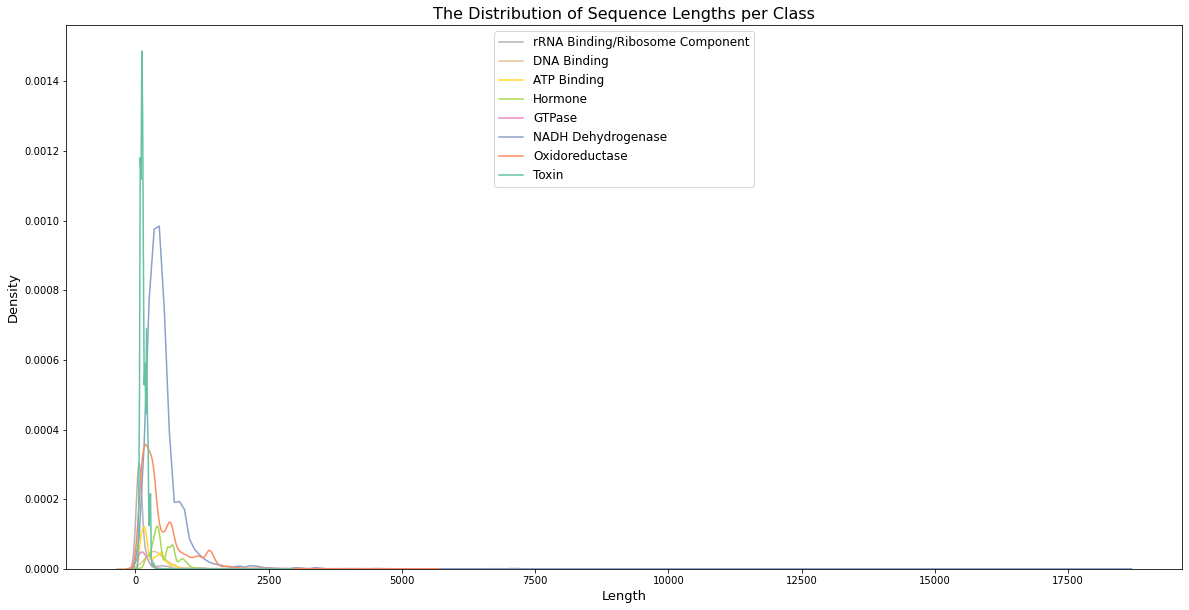

In [95]:
#plot the distribution of sequence lengths per class
plt.figure(figsize = (20,10))
sns.kdeplot(data = protein, x = 'Length', hue = 'class', palette = 'Set2')
labels = ['rRNA Binding/Ribosome Component', 'DNA Binding', 'ATP Binding', 'Hormone', 'GTPase', 'NADH Dehydrogenase', 'Oxidoreductase', 'Toxin']
plt.legend(labels, fontsize = 12, loc = 'upper center')
plt.title('The Distribution of Sequence Lengths per Class', fontsize = 16)
plt.xlabel(xlabel = 'Length', fontsize = 13)
plt.ylabel(ylabel = 'Density', fontsize = 13);

<ipython-input-125-58e983240c44>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('images/class_imbalance', bbox_inches = 'tight', quality = '85')


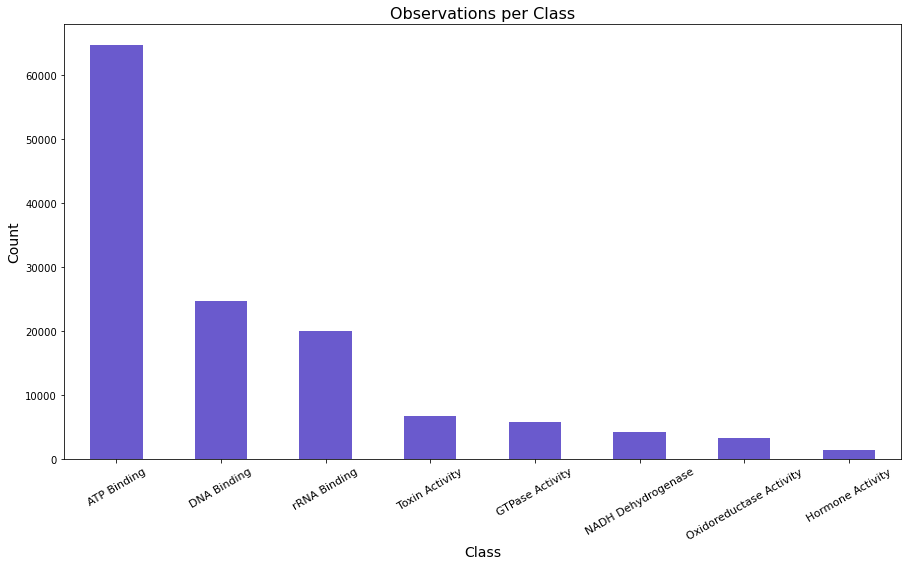

In [125]:
#plot the value counts of the different classes
plt.figure(figsize = (15,8))
protein['class'].value_counts().plot(kind='bar', color = '#6A5ACD')
plt.title('Observations per Class', fontsize = 16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

##changing the class values back into names -- based on the order of class frequency
##x-ticks with class number -- 3,2,1,8,5,6,7,4
plt.xticks(np.arange(0,8), ('ATP Binding', 'DNA Binding', 'rRNA Binding', 'Toxin Activity', 'GTPase Activity',
                       'NADH Dehydrogenase', 'Oxidoreductase Activity', 'Hormone Activity'), fontsize=11, rotation = 30);
#uncomment to save graph locally
plt.savefig('images/class_imbalance', bbox_inches = 'tight', quality = '85')

#### Visualization of Class Frequency
The visualization above shows the count of observations within each of the classes. The largest class, ATP Binding, contains 64,687 observations while the smallest class, Hormone Activity, contains only 1,515 observations. This is a severe class imbalance, and is has to be handled accordingly during modeling. 

During modeling, stratification of the classes was done during the train/test split. Over-sampling of the smaller classes was attempted using SMOTE, but due to the nature of the data the creation of new data was too time-consuming to sustain for the project timeline and thus not followed.

## The Longest Protein in the Data

In [106]:
#the max len is 18,562 -- can be see from protein.describe above
protein[protein['Length'] == 18562]

,Gene ontology (molecular function),Sequence,Length,Organism,Protein names,class
77061,actin filament binding [GO:0051015]; ATP bindi...,MEGNEKKGGGLPPTQQRHLNIDTTVGGSISQPVSPSMSYSTDRETV...,18562,Caenorhabditis elegans,Titin homolog (EC 2.7.11.1),3


In [111]:
#the GO: full molecular function for the longest protein in the data
protein[protein['Length'] == 18562]['Gene ontology (molecular function)'].value_counts()

actin filament binding [GO:0051015]; ATP binding [GO:0005524]; metal ion binding [GO:0046872]; myosin binding [GO:0017022]; protein serine/threonine kinase activity [GO:0004674]    1
Name: Gene ontology (molecular function), dtype: int64

## The Most Common Protein in the Data - Proline-tRNA ligase

In [18]:
#find the most common protein in the data
protein['Protein names'].value_counts().head(5)

Proline--tRNA ligase (EC 6.1.1.15) (Prolyl-tRNA synthetase) (ProRS)                                                                                                                                                                              704
Leucine--tRNA ligase (EC 6.1.1.4) (Leucyl-tRNA synthetase) (LeuRS)                                                                                                                                                                               656
Serine--tRNA ligase (EC 6.1.1.11) (Seryl-tRNA synthetase) (SerRS) (Seryl-tRNA(Ser/Sec) synthetase)                                                                                                                                               646
tRNA dimethylallyltransferase (EC 2.5.1.75) (Dimethylallyl diphosphate:tRNA dimethylallyltransferase) (DMAPP:tRNA dimethylallyltransferase) (DMATase) (Isopentenyl-diphosphate:tRNA isopentenyltransferase) (IPP transferase) (IPPT) (IPTase)    638
Translation initiati

In [19]:
#there are 704 instances of this protein names
#however they are all from different organisms
print('There are 704 instances of Prolyl-tRNA synthetase in the dataset.')
print(f"The number of organisms for Prolyl-tRNA synthetase is: {protein[protein['Protein names'] == 'Proline--tRNA ligase (EC 6.1.1.15) (Prolyl-tRNA synthetase) (ProRS)']['Organism'].nunique()}.")
print(f"The number of unique classes " \
      f"Prolyl-tRNA synthetase falls under is: {protein[protein['Protein names'] == 'Proline--tRNA ligase (EC 6.1.1.15) (Prolyl-tRNA synthetase) (ProRS)']['class'].nunique()}.")
print("The one unique class for Prolyl-tRNA synthetase is Class 3: ATP Binding.")

There are 704 instances of Prolyl-tRNA synthetase in the dataset.
The number of organisms for Prolyl-tRNA synthetase is: 704.
The number of unique classes Prolyl-tRNA synthetase falls under is: 1.
The one unique class for Prolyl-tRNA synthetase is Class 3: ATP Binding.


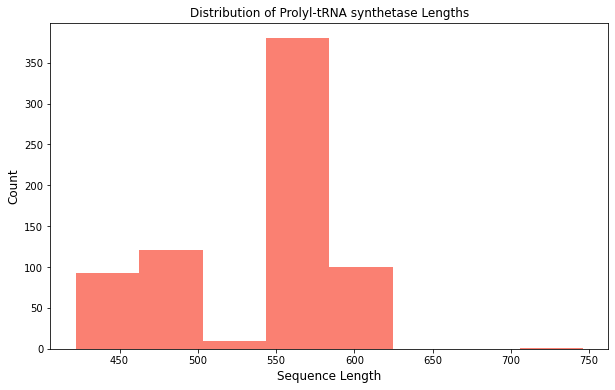

In [20]:
#how similar are these sequences to each other?
#get the distribution of lengths for prolyl t-RNA synthase
len_prolyl = protein[protein['Protein names'] == 'Proline--tRNA ligase (EC 6.1.1.15) (Prolyl-tRNA synthetase) (ProRS)']['Length']

#plot the distributions
plt.figure(figsize = (10,6))
plt.hist(len_prolyl, bins = 8, color = '#FA8072')
plt.title('Distribution of Prolyl-tRNA synthetase Lengths')
plt.xlabel("Sequence Length", fontsize = 12)
plt.ylabel("Count", fontsize = 12);

#### Visualization Interpretation
The visualization above is the distribution of sequence lengths for the most common protein in the dataset: Prolyl t-RNA synthetase. In the visualization, we see that there is a bimodal distribution of the lengths of Prolyl t-RNA synthetase. One mode around 450-500 amino acids and the second mode around 550-600 amino acids. 

This visualization is important as it shows how variable the same protein, Prolyl t-RNA synthetase, is between different organisms. 

In [ ]:
#calculate the average difference in sequences from the first instance of prolyl-tRNA synthase
#to the last instance
s = SequenceMatcher(None, text1, text2)
similarity = s.ratio() * 100

In [77]:
#grab all of the instances of the prolyl-tRNA synthetase
prolyl_seq = protein[protein['Protein names'] == 'Proline--tRNA ligase (EC 6.1.1.15) (Prolyl-tRNA synthetase) (ProRS)'].reset_index()['Sequence']
prolyl_seq

0      MRVSRLMLVTLRDVPAEAEIVSHQLLIRGGFIKRVTSGIYAYMPLM...
1      MRVTTSFPLGTLRDTPSEAEIISHQLLLQAGYIRRVNSGIYAYMPI...
2      MKASKYILPTEKENPADAVVASHRLMIRAGLVRKSSAGLYFYLPLG...
3      MEFSEWYSEILEKAGIYDLRYPIKGCGVYLPYGFKIRRYSFEILRK...
4      MQRSQRLSQMLFVTLREDPAEAELISHKLLLRGGFIRRLSPGIYTY...
                             ...                        
699    MRLSEFHLHTTKEIPADAELVSHRLMLRAGMIRKLASGLYTWSPLG...
700    MAKELKELTPRSESYSQWYQDLVIKADLAENSAVRGCMVIKPYGYA...
701    MRLSQSLFVTLREDPADAEIPSHKLLLRAGYIRRIGRGIYAYLPLM...
702    MLFSKLFAPTLKEPPKDAVLKSHKHLAQAGYIYQVGSGIYNFLPLA...
703    MRQSIFFMPTLKETPADAVAKSHQVMLRGGYIRQVTAGVYSYLPLG...
Name: Sequence, Length: 704, dtype: object

In [88]:
#make the 1-letter code into a word for sequence matching
prolyl_seq = prolyl_seq.apply(lambda x: make_words(x))

In [92]:
#grab the first value in prolyl_seq
first_instance_prolyl = prolyl_seq[0]

#loop over and find the average of the sequence similarities between the first sequence and the rest
similar = []
for seq in prolyl_seq.iloc[1:]:
    s = SequenceMatcher(None, first_instance_prolyl, seq)
    similar.append(s.ratio())

0.027607179150943288

In [109]:
#sequence similarity over all prolyl's
seq_similarity = []

#loop over each index and each sequence not at that index -- nested for loop
for indx in range(len(prolyl_seq)):
    seq_at_indx = prolyl_seq[indx]
    
    #drop the sequence we are matching
    for seq in prolyl_seq.drop(index = indx):
        s = SequenceMatcher(None, seq_at_indx, seq)
        seq_similarity.append(s.ratio())

In [118]:
#print the average sequence similarity between all sequences and one another!
print(f"The average sequence similarity between all sequences and each other is: {round(np.mean(seq_similarity)*100,2)}%.")

#print the average similarity between the first prolyl sequence (index 0) and the other functions
#multiply by 100 to get the percentage of similarity
print(f"The average sequence similarity for Prolyl-tRNA synthetase sequence at series index 0 is: {round(np.mean(similar)*100,2)}%.")

The average sequence similarity between all sequences and each other is: 3.53%.
The average sequence similarity for Prolyl-tRNA synthetase sequence at series index 0 is: 2.76%.


In [101]:
#the largest length of sequence that matches between sequence at index 0 and index 1
SequenceMatcher(None,prolyl_seq[0], prolyl_seq[1]).find_longest_match(0, len(prolyl_seq[0]), 0, len(prolyl_seq[1]))

Match(a=0, b=0, size=6)

### The Smallest Protein

In [21]:
#protein lengths that are less than 10
protein[protein['Length'] < 10].sort_values(by = "Length").head()

,Gene ontology (molecular function),Sequence,Length,Organism,Protein names,class
158920,toxin activity [GO:0090729],LWKT,4,Pandinus imperator (Emperor scorpion),Tetrapandin-2,8
156246,"2 iron, 2 sulfur cluster binding [GO:0051537];...",MAKA,4,Pseudomonas carboxydohydrogena,Carbon monoxide dehydrogenase small chain (CO ...,7
155469,oxidoreductase activity [GO:0016491],MGHP,4,Pseudomonas carboxydohydrogena,Carbon monoxide dehydrogenase large chain (CO ...,7
140760,hormone activity [GO:0005179],GFAD,4,Achatina fulica (Giant African snail) (Lissach...,Achatin-1 (Achatin-I),4
158966,toxin activity [GO:0090729],LWSG,4,Pandinus imperator (Emperor scorpion),Tetrapandin-1,8


#### Smallest Proteins - Length of 4
The Tetrapandin-1, Tetrapandin-2 and Achatin-1 are proteins, which only have a length of 4 amino acids. Mixed in with these naturally smaller protein sequences and protein fragments (fragments of larger proteins).  

These naturally smaller proteins and smaller protein fragments might have trouble being correctly classified in the models. 

In [22]:
#how many fragments are in the data
fragment = protein[(protein['Protein names'].str.contains("(Fragment)", regex = False))]

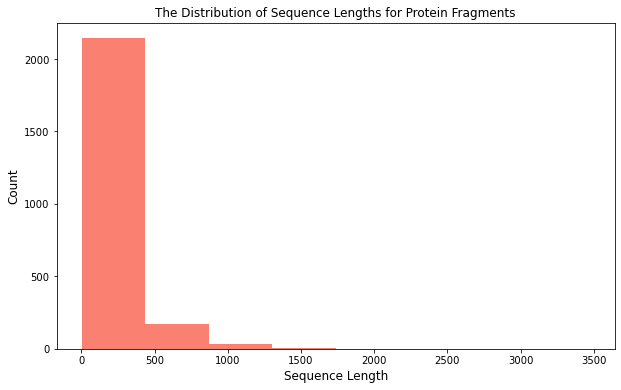

In [23]:
#plot the distribution of lengths of fragments
plt.figure(figsize=(10,6))
plt.hist(fragment['Length'], bins = 8, color = '#FA8072')
plt.title('The Distribution of Sequence Lengths for Protein Fragments')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Sequence Length",fontsize=12);

#### Visualization Interpretation

The visualization above is showing the distribution of lengths for the proteins that are labeled as "fragment". As we can see the distribution for the fragment lengths is right-skewed, with a longer right tail. Protein fragments are chunks of larger sequences, but as we can see they have variable lengths, rangining from 4 to approximately 1750. 

## Sequence Similarity In Each Class

### Class 1. rRNA Binding, structural constituent of the ribosome

In [8]:
#calculate the sequence similarity between the different classes
rna_bind = protein[protein['class']==1].reset_index()['Sequence']

In [9]:
#make each single letter amino acid into a word
rna_bind = rna_bind.apply(lambda x: make_words(x))

In [10]:
#grab the first sequence of the dna binding class for comparison
first_rna_seq = rna_bind[0]

#loop over and find the average of the sequence similarities between the first dna sequence and the rest
rna_similarities = [SequenceMatcher(None, first_rna_seq, seq).ratio() for seq in rna_bind.iloc[1:]]

In [12]:
#get the average sequence similarity between the first rna binding observation 
#and the rest of the class observations
print(f'The average sequence similarity between the first DNA binding sequence in the data and the rest of the class is: {round((np.mean(rna_similarities)*100),4)}%.')

The average sequence similarity between the first DNA binding sequence in the data and the rest of the class is: 8.9953%.


### Class 2. DNA Binding

In [21]:
#calculate the sequence similarity in the DNA binding class
dna_bind = protein[protein['class']==2].reset_index()['Sequence']

In [22]:
#make each single letter amino acid into a word
dna_bind = dna_bind.apply(lambda x: make_words(x))

In [23]:
#grab the first sequence of the dna binding class for comparison
first_dna_seq = dna_bind[0]

#loop over and find the average of the sequence similarities between the first dna sequence and the rest
dna_similarities = [SequenceMatcher(None, first_dna_seq, seq).ratio() for seq in dna_bind.iloc[1:]]

In [57]:
#get the average sequence similairty between the first dna binding obsercatio and the rest of the class observations
print(f'The average sequence similarity between the first DNA binding sequence in the data and the rest of the class is: {round((np.mean(dna_similarities)*100), 4)}%.')

The average sequence similarity between the first DNA binding sequence in the data and the rest of the class is: 3.8486%.


### Class 3. ATP Binding

In [28]:
#calculate the sequence similarity in the DNA binding class
atp_bind = protein[protein['class']==3].reset_index()['Sequence']

In [29]:
#make each single letter amino acid into a word
atp_bind = atp_bind.apply(lambda x: make_words(x))

In [30]:
#grab the first sequence of the atp binding class for comparison
first_atp_seq = atp_bind[0]

#loop over and find the average of the sequence similarities between the first atp sequence and the rest
atp_similarities = [SequenceMatcher(None, first_atp_seq, seq).ratio() for seq in atp_bind.iloc[1:]]

In [55]:
#get the average sequence similairty between the first atp binding obsercatio and the rest of the class observations
print(f'The average sequence similarity between the first ATP binding sequence in the data and the rest of the class is: {round((np.mean(atp_similarities)*100), 4)}%.')

The average sequence similarity between the first ATP binding sequence in the data and the rest of the class is: 0.4104%.


### Class 4. Hormone Activity

In [24]:
#calculate the sequence similarity in hormone class
hormone = protein[protein['class']==4].reset_index()['Sequence']

In [25]:
#make each single letter amino acid into a word
hormone = hormone.apply(lambda x: make_words(x))

In [36]:
#grab the first sequence of the hormone class for comparison
first_h_seq = atp_bind[0]

#loop over and find the average of the sequence similarities between the first hormone and the rest
h_similarities = [SequenceMatcher(None, first_h_seq, seq).ratio() for seq in hormone.iloc[1:]]

In [54]:
#get the average sequence similairty between the first hormone observation and the rest of the class observations
print(f'The average sequence similarity between the first Hormone sequence in the data and the rest of the class is: {round((np.mean(h_similarities)*100), 4)}%.')

The average sequence similarity between the first Hormone sequence in the data and the rest of the class is: 0.5831%.


In [42]:
#sequence similarity over all hormone sequences
seq_similarity = []

#loop over each index and each sequence not at that index -- nested for loop
for indx in range(len(hormone)):
    seq_at_indx = hormone[indx]
    
    #drop the sequence we are matching
    for seq in hormone.drop(index = indx):
        s = SequenceMatcher(None, seq_at_indx, seq)
        seq_similarity.append(s.ratio())

In [53]:
#get the average sequence similairty between each hormone observation and it's other classmates
print(f'The average sequence similarity between each Hormone sequence is: {round((np.mean(seq_similarity)*100), 4)}%.')

The average sequence similarity between each Hormone sequence is: 10.7423%.


### Class 5. GTPase Activity

In [45]:
#calculate the sequence similarity in the gtpase class
gtp = protein[protein['class']==5].reset_index()['Sequence']

#make each single letter amino acid into a word
gtp = gtp.apply(lambda x: make_words(x))

In [46]:
#grab the first sequence of the gtpase class for comparison
first_gtp_seq = gtp[0]

#loop over and find the average of the sequence similarities between the first gtpase sequence and the rest
gtp_similarities = [SequenceMatcher(None, first_gtp_seq, seq).ratio() for seq in gtp.iloc[1:]]

In [52]:
#get the average sequence similairty between the first gtpase observation and the rest of the class observations
print(f'The average sequence similarity between the first GTPase sequence in the data and the rest of the class is: {round((np.mean(gtp_similarities)*100), 4)}%.')

The average sequence similarity between the first GTPase sequence in the data and the rest of the class is: 3.6121%.


### Class 6. NADH Dehydrogenase Activity

In [14]:
#calculate the sequence similarity in the nadh dehydrogenase class
nadh = protein[protein['class']==6].reset_index()['Sequence']

#make each single letter amino acid into a word
nadh = nadh.apply(lambda x: make_words(x))

In [16]:
#grab the first sequence of the nadh dehydrogenase class for comparison
first_nadh_seq = nadh[0]

#loop over and find the average of the sequence similarities between the first nadh dehydrogenase sequence and the rest
nadh_similarities = [SequenceMatcher(None, first_nadh_seq, seq).ratio() for seq in nadh.iloc[1:]]

In [17]:
#get the average sequence similairty between the first nadh dehydrogenase observation and the rest of the class observations
print(f'The average sequence similarity between the first NADH Dehydrogenase sequence in the data and the rest of the class is: {round((np.mean(nadh_similarities)*100), 4)}%.')

The average sequence similarity between the first NADH Dehydrogenase sequence in the data and the rest of the class is: 4.3224%.


### Class 7. Oxidoreductase Activity

In [18]:
#calculate the sequence similarity in the oxidoreductase class
oxido = protein[protein['class']==7].reset_index()['Sequence']

#make each single letter amino acid into a word
oxido = oxido.apply(lambda x: make_words(x))

In [19]:
#grab the first sequence of the oxidoreductase class for comparison
first_oxido_seq = oxido[0]

#loop over and find the average of the sequence similarities between the first oxidoreductase sequence and the rest
oxido_similarities = [SequenceMatcher(None, first_oxido_seq, seq).ratio() for seq in oxido.iloc[1:]]

In [20]:
#get the average sequence similairty between the first oxidoreductaseobservation and the rest of the class observations
print(f'The average sequence similarity between the first Oxidoreductase sequence in the data and the rest of the class is: {round((np.mean(oxido_similarities)*100), 4)}%.')

The average sequence similarity between the first Oxidoreductase sequence in the data and the rest of the class is: 2.8573%.


### Class 8. Toxin Activity

In [37]:
#calculate the sequence similarity in the toxin class
toxin = protein[protein['class']==8].reset_index()['Sequence']

#make each single letter amino acid into a word
toxin = toxin.apply(lambda x: make_words(x))

In [38]:
#grab the first sequence of the toxin class for comparison
first_toxin_seq = toxin[0]

#loop over and find the average of the sequence similarities between the first toxin sequence and the rest
toxin_similarities = [SequenceMatcher(None, first_toxin_seq, seq).ratio() for seq in toxin.iloc[1:]]

In [39]:
#get the average sequence similairty between the first toxin observation and the rest of the class observations
print(f'The average sequence similarity between the first Toxin sequence in the data and the rest of the class is: {round((np.mean(toxin_similarities)*100), 4)}%.')

The average sequence similarity between the first Toxin sequence in the data and the rest of the class is: 21.6379%.


In [40]:
#the largest length of sequence that matches between sequence at index 0 and 1 for toxin class
SequenceMatcher(None, toxin[0], toxin[1]).find_longest_match(0, len(toxin[0]), 0, len(toxin[1]))

Match(a=73, b=73, size=49)